In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [5]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [6]:
# Importing models
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-3.06336e-11
LotArea,0.0789996
OverallQual,0.214395
OverallCond,0.0964787
YearBuilt,0.160799
YearRemodAdd,0.0253524
BsmtFinSF1,0.0914664
BsmtUnfSF,-0.0330798
TotalBsmtSF,0.138199


###### Ridge Regression

In [9]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [11]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091342
0.11710797319752984
0.11723952924901117
0.11741457158889518
0.1176238406871145
0.11825709631198021
0.11900057469147927
0.1225464999629295
0.13073599680747128


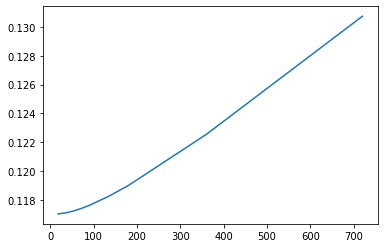

In [12]:
plt.plot(alphas, mses)

###### Lasso

In [13]:
# Import Lasso
from sklearn.linear_model import Lasso

In [14]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-1.25303e-11
LotArea,0.0443042
OverallQual,0.298079
OverallCond,0
YearBuilt,0.0520907
YearRemodAdd,0.0644712
BsmtFinSF1,0.115875
BsmtUnfSF,-0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [16]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.1165475190960879
0.11682687945311097
0.1180334835313203
0.12012836764958999
0.12301536903084041
0.13178576395045638
0.14017194584483775


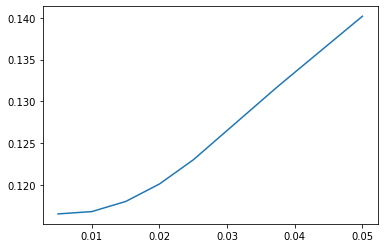

In [17]:
plt.plot(alphas, mses)